<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/GNN_Graph_Representation_(embedding)_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graph Representation (embedding)**

Stanford CS224W 2019
스터디 7강 리뷰 자료 

[velog.io/@tobigs-gnn1213/7.Graph-Representation-Learning#4-embedding-entire-graphs](https://https://velog.io/@tobigs-gnn1213/7.-Graph-Representation-Learning#4-embedding-entire-graphs)

https://jxnjxn.tistory.com/73

# **0.Introduction**

##**[Representation Learning]**

representation learning이란 컴퓨터가 어떤 task를 수행하기에 적절하게 데이터의 representation을 변형하는 과정을 학습하는 것

Machine Learning Lifecycle에서 Raw data로부터 Feature Engineering을 거치지 않고 pipiline을 구축 가능하도록 하는 것이 딥러닝의 핵심

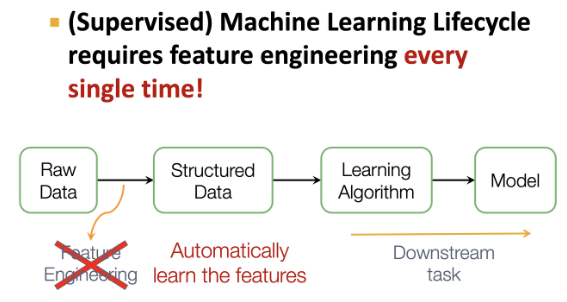

##**[Feature Learning in Graphs]**

Feature Engineering 과정을 Automatically learn the features로 수행하기 위해서 Graph의 구조를 vector로 바꾸는 Embedding (feature represention) 과정을 거치게 된다. 왼쪽의 그래프를 모델에 input으로 넣어주기 위해서 mapping 함수 f를 사용해서 d-dimension의 vertor로 바꿔줄 것이다.

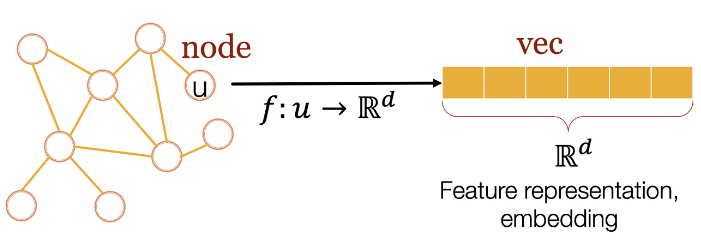

인접행렬(adjacency matrix)를 사용하는 방법이겠지만, 인접행렬은 노드 갯수만큼의 차원을 가진 고차원의 행렬이기 때문에 사용에 어려움이 있다. 따라서 각 노드를 low-dimensional space에 mapping하는 방법을 사용한다.

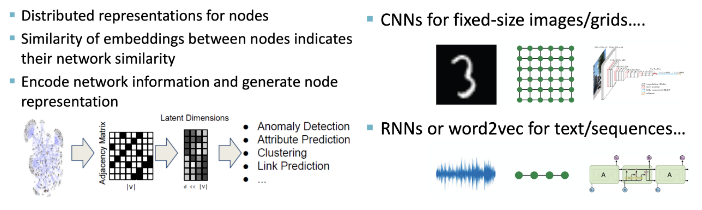

이 때 그래프는 이미지 데이터처럼 일정한 grid 형식도 아니고, text나 음성처럼 sequence 데이터도 아니기 때문에 Embedding 하는 방법이 어렵다.

- Complex topographical structure
- No fixed node ordering or reference point (i.e., no spatial locality like grids) -> 고정 노드 순서를 정할 수 없음
- Often dynamic and have multimodal features.

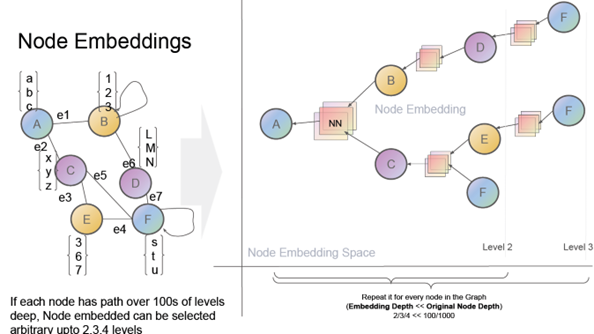

# **1.Embedding Nodes**

임베딩의 목표 : 원래 네트워크에 있는 similarity(유사성)에 근사하게 embedding space에 인코딩(embedding)하는 것

예) 원래 네트워크에서 a노드와 b노드가 유사하다면 embedding space에 mapping했을 때도 a,b노드는 서로 유사해야합

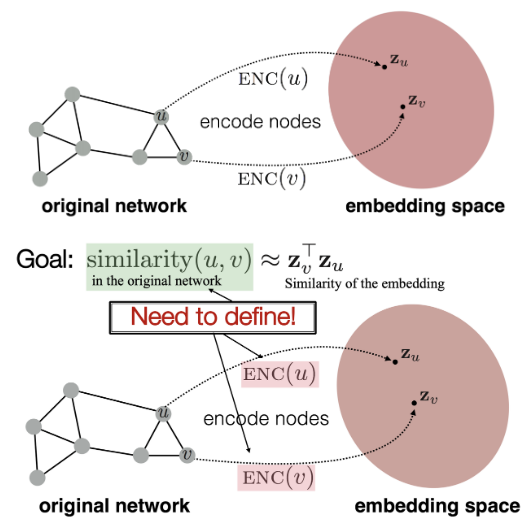

- graph G
- vertex(node) set V
- adjacency matrix A (assume binary)
- node feature나 그 외의 추가 정보는 고려하지 않음
- 노드의 유사성(similarity)에 대한 정의는 엔코딩 ENC(u), ENC(v)의 dot product로 측정

##**[Learning Node Embedings]**

- Define an **encoder** (a mapping from nodes to embeddings) : encoder 정의
- Define a **node similarity function** (a measure of similarity in the original network) : 노드 유사성을 구하는 함수 정의
- Optimize the parameters of the encoder so that : **similarity(u,v) : encoder의 파라미터 최적화**

##**[Encoder]**

각 node를 low-dimensional vector로 mapping해준다.

예) shallow encoding

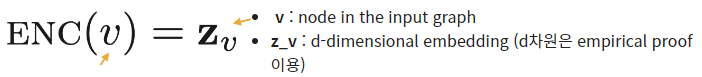

####**[Shallow Encoding]**

가장 쉬운 encoding 접근법으로 encoder는 그냥 embedding-lookup 이다. (참조하는 해시테이블에 불과, lookup table 개념)

각 노드당 한 column의 unique vector로 임베딩. **이외의 방법으로는 DeepWalk, node2vec, TransE** 등이 있다.

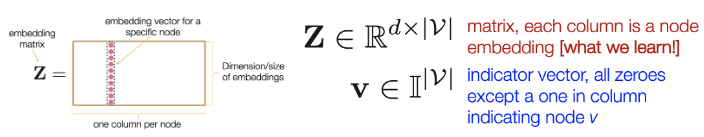

##**[Similarity function]**

specifies how the relationships in vector space map to the relationships in the original network

어떻게 node similarity를 정의할지가 핵심인데 이 때 많은 고려사항들이 있다.

- 두 노드가 연결되어있는지?
- 두 노드가 이웃을 공유하는지?
- 두 노드의 구조적 역할이 비슷한지?

어떻게 node similarity를 정의할지가 핵심인데 이 때 많은 고려사항들이 있습니다.

두 노드가 연결되어있는지?
두 노드가 이웃을 공유하는지?
두 노드의 구조적 역할이 비슷한지?

# **2.Random Walk Approaches to Node Embedding**

- DeepWalk: Online Learning of Social Representations 
  [arxiv.org/pdf/1403.6652.pdf](https://arxiv.org/pdf/1403.6652.pdf)
- node2vec: Scalable Feature Learning for Networks 
  [cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf](https://https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf)

### **2-1. DeepWalk**

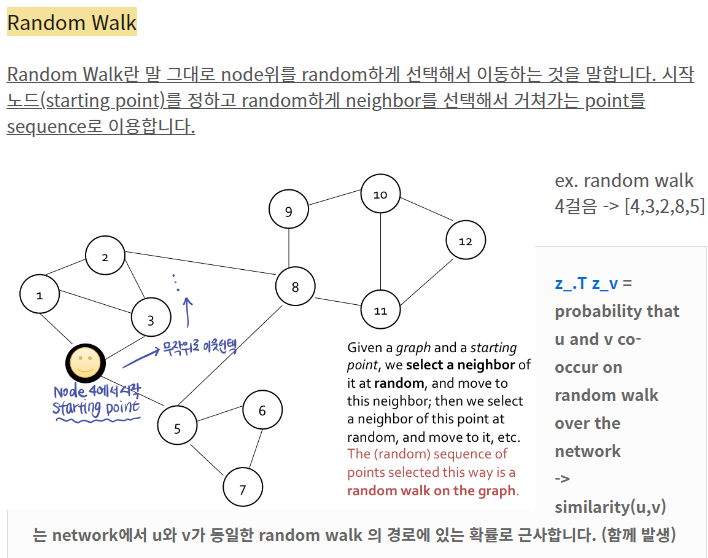

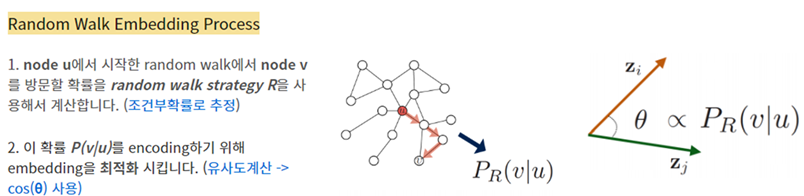

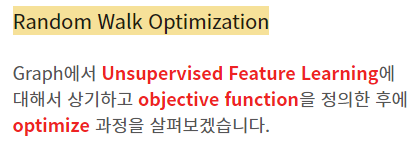

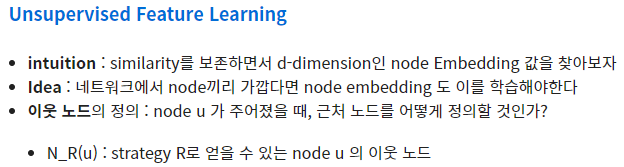

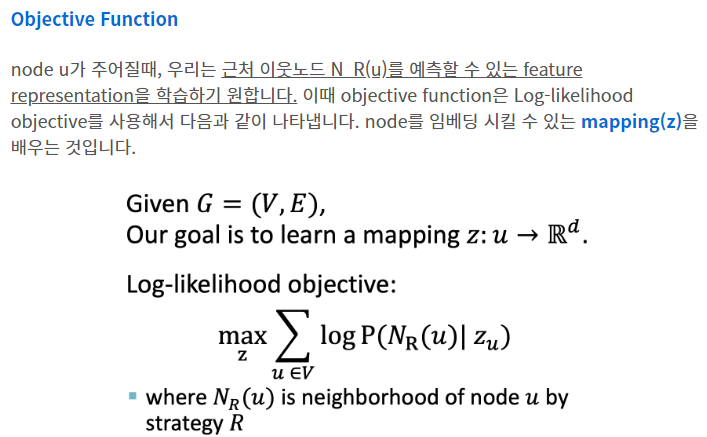

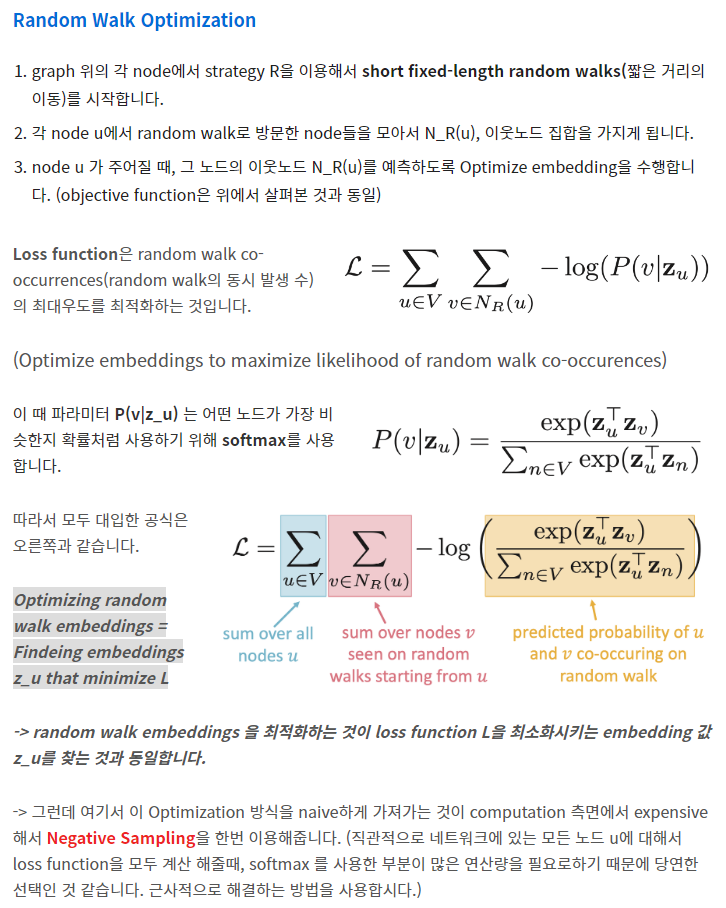

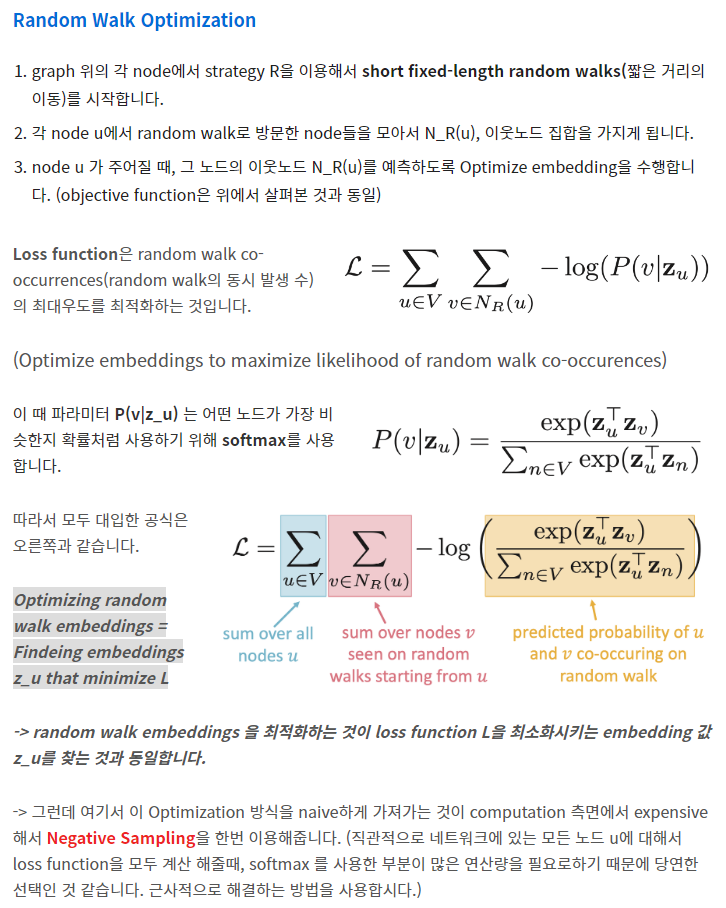

### **2-2. node2vec**

큰 목표는 네트워크 안에 비슷한 이웃 노드끼리 가까운 feature space에 mapping 되도록 Embed nodes를 구하는 것으로 node Embedding의 목표와 동일

여기에 추가적으로 다양한 task에 적용이 가능하도록 downstream prediction task에 독립적으로 만드는 것이 목적.

핵심은 네트워크에서 node u의 이웃의 개념이 각 node embedding에 유연하게 이어지는 것. (대충 유연하게 이웃개념을 잘 임베딩할 수 있다는 말)

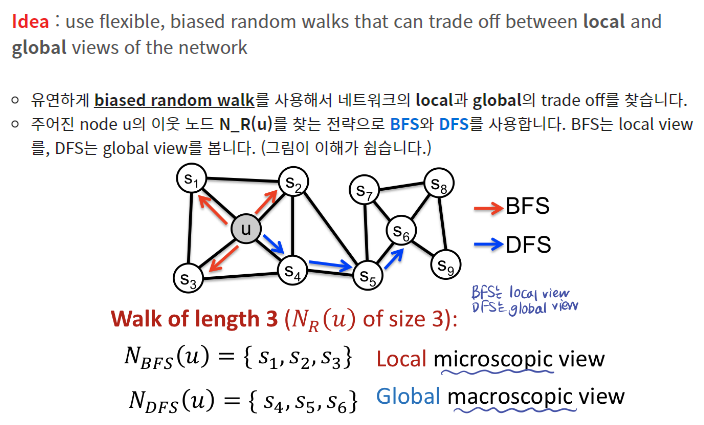

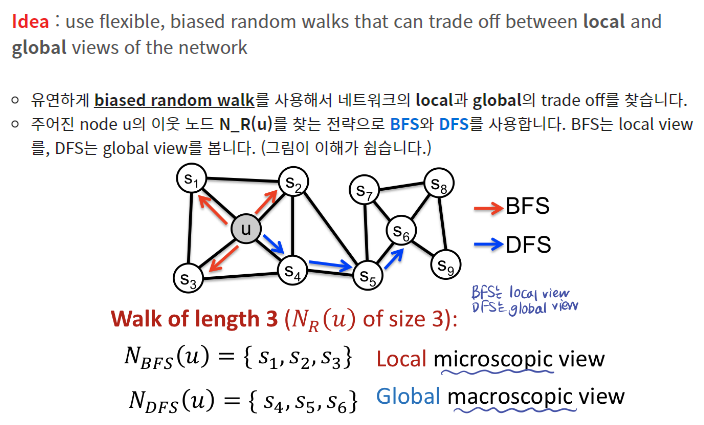

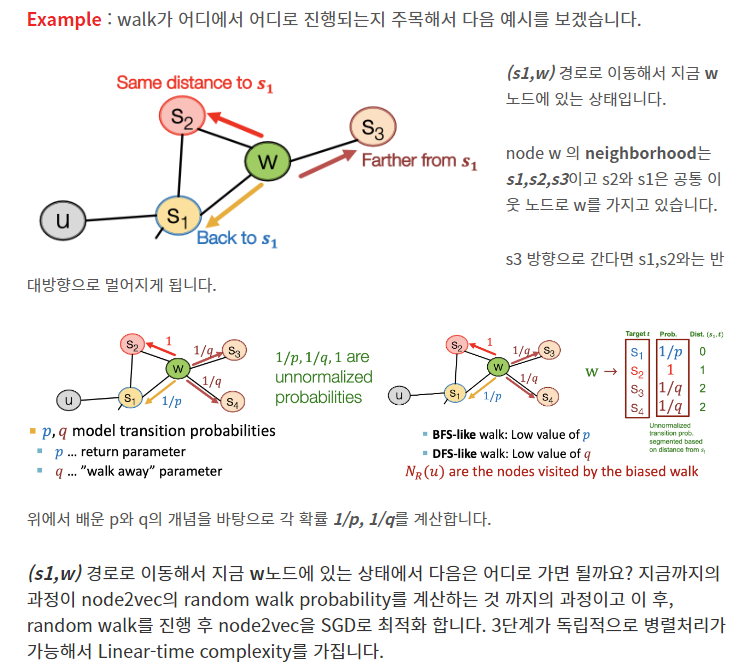

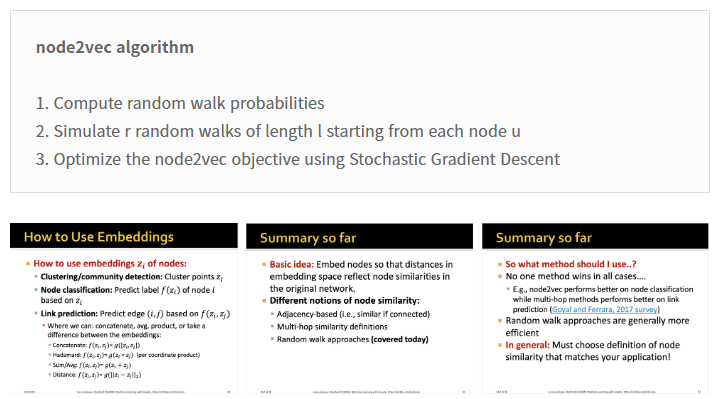

## **3. Translating Embeddings for Modeling Multi-relational Data (TransE)**

**Knowledge Graph(KG)**의 node들을 embedding할 수 있는 TransE에 대해서 알아보겠습니다.

**Knowledge graph**는 entity간의 상호관계에 대한 사실/상태로 이뤄진 그래프입니다. (데이터베이스에서 배우는 관계형 데이터 베이스(ERD)를 생각하면 편할 것 같다. entity와 relationship 개념이 존재). 

- Node = entity
- edge = relation

knowledge graph에 대해서는 Link Prediction에 대한 연구가 활발. 

entity(node)간의 관계인 relation(edge)에 대해서 놓치고 있는것이 있다면 이로 인해 많은 정보가 누락되기 때문.

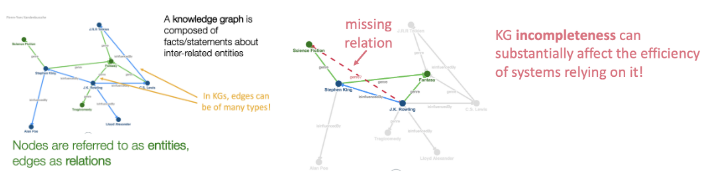

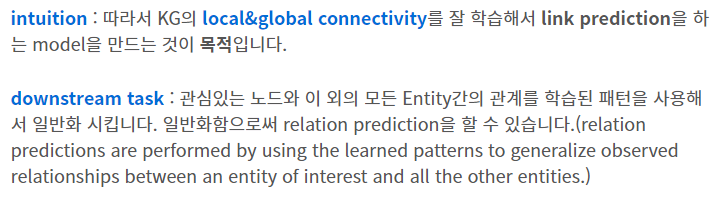

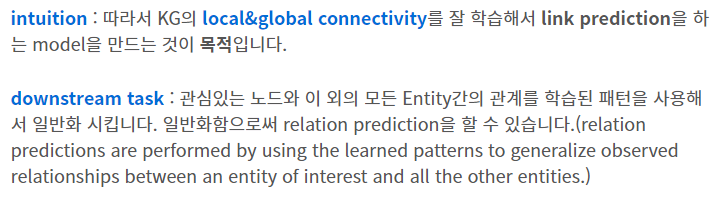

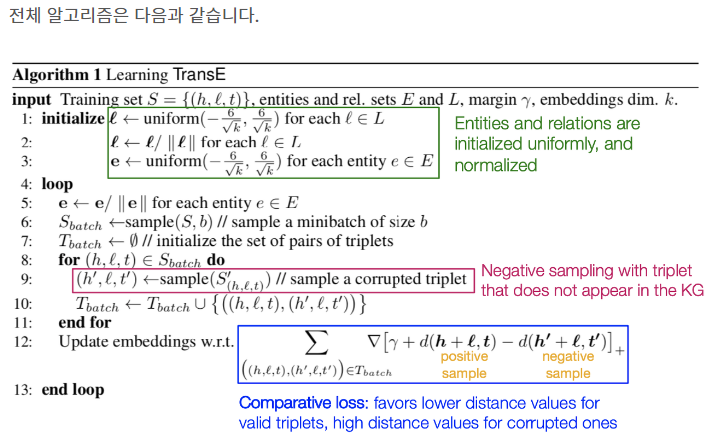

## **4. Embedding Entire Graphs**

지금까지는 node embedding에 대해서 배웠습니다. 그래프의 노드를 어떻게 embedding space의 vector로 더 잘 표현할 것인가, 어떻게 노드가 가진 이웃과의 관계 정보(유사성)을 포함시켜서 표현할 것인가를 중점적으로 봤다.

이번에는 **Graph G를 통채로 embedding 하는 방법, 전체뿐만 아니라 sub-graph를 한 point로 임베딩하는 방법**을 보겠다.

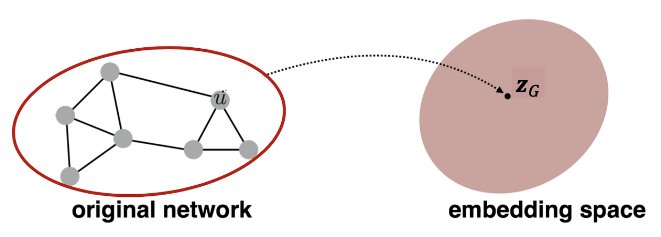

전체 그래프 G를 임베딩하는 것이 목표이기 때문에, 이 결과는 toxic vs non-toxic molecules 의 분류, 비정상적인 그래프 식별 등의 task에 이용할 수 있다.

Graph embedding에 대한 3가지 접근

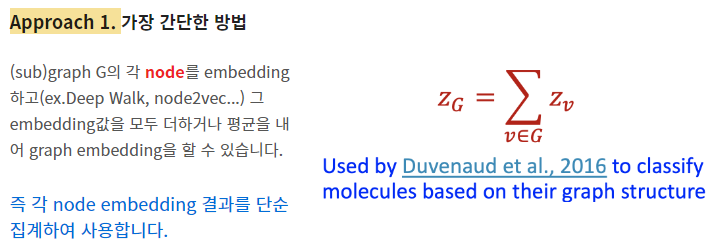

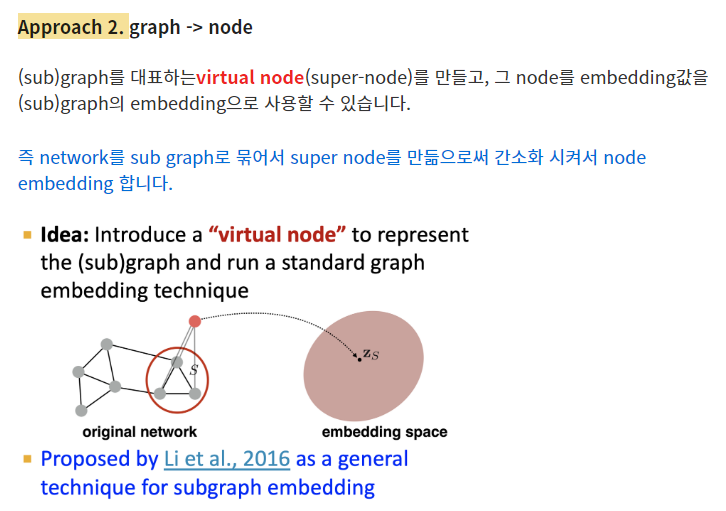

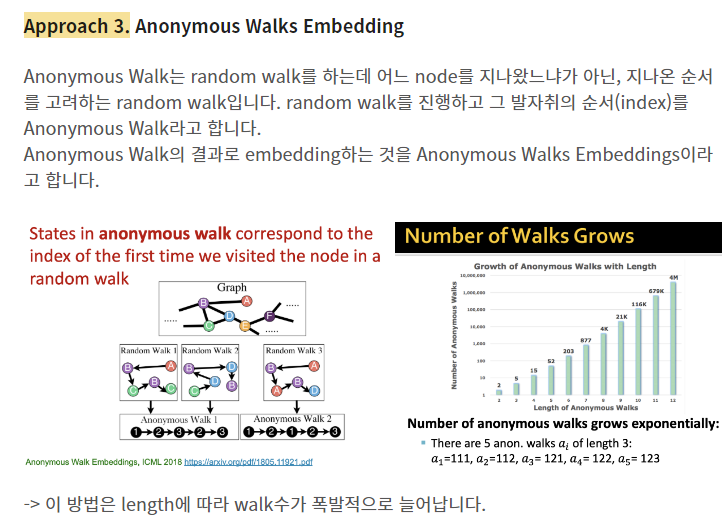

##Reference

Stanford CS224W 2019
스터디 7강 리뷰 자료 

[velog.io/@tobigs-gnn1213/7.Graph-Representation-Learning#4-embedding-entire-graphs](https://https://velog.io/@tobigs-gnn1213/7.-Graph-Representation-Learning#4-embedding-entire-graphs)

Think Graph Neural Networks (GNN) are hard to understand? Think Graph Neural Networks (GNN) are hard to understand?

Part 2 (https://youtu.be/VDzrvhgyxsU): Graph representations Adjacency Matrix Feature Matrix Incidence Matrix Degree Matrix Laplacian Matrix Bag of Nodes Node Embedding and Node Embedding Space Applying Convolution to Graph similar to Image Message Passing Understanding Graph Datasets available in PyG Node Classification using MLP & GNN NetworkX and tSNE visualization of Graphs GNN Explainer Google colab notebooks https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks

Part 2 PDF document: https://github.com/prodramp/DeepWorks/blob/main/GraphNeuralNetworks/Graph%20Neural%20Networks%20-%20Part2.pdf